In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from scipy.stats import beta
import scipy

In [3]:
#in general, fix your data structures to be more easily usable + efficient
# read numpy docs!

mass = [
7.95442531,
10.60408232,
9.9020277,
10.42288788,
17.2193401,
10.06076572,
10.00176003,
7.8289388,
9.55481385,
9.99981543,
10.3156156,
10.70547087,
9.80374407,
7.62085689,
9.60747351,
]

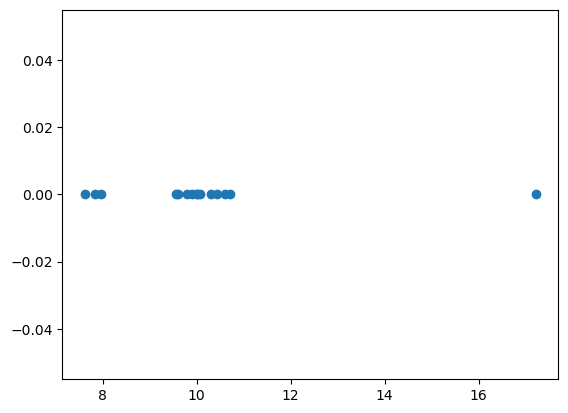

In [23]:
plot.scatter(mass, np.zeros(len(mass)))
# reduce point size, fix styling etc.

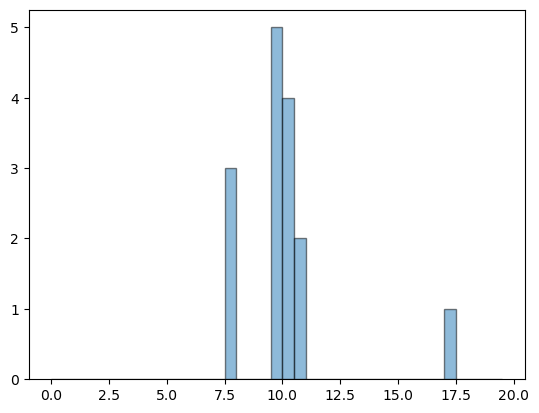

In [29]:
plot.hist(mass,bins=np.arange(0,20,.5),edgecolor='black',alpha=.5)
# plot.errorbar(yerr=1)
# deal w/ error bars
plot.show()

Text(0, 0.5, 'm')

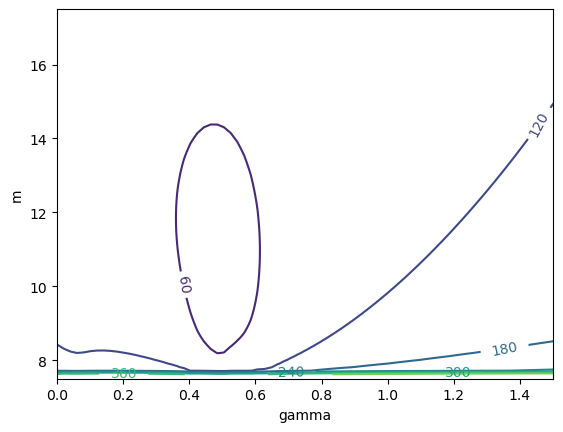

In [141]:
# task 2
# 1. unbinned negative log-likelihood fn
def NLL(m, gamma):
    return -2*np.sum(np.log(scipy.stats.cauchy.pdf(mass,loc=m,scale=gamma)))

# scan over mass, width (m, gamma)
# linspace vs arange inclusive endpoints etc. ? 
# https://stackoverflow.com/questions/62106028/what-is-the-difference-between-np-linspace-and-np-arange
m_vals = np.linspace(min(mass), max(mass), num=100)
gamma_vals = np.linspace(10**-5, 2, num=100)
# jank right now to turn this into contour plot
NLL_vals = [[NLL(m, gamma) for m in m_vals] for gamma in gamma_vals]
NLL_vals = np.array(NLL_vals)

fig, ax = plot.subplots()
CS = ax.contour(gamma_vals, m_vals, NLL_vals)
ax.clabel(CS, inline=True, fontsize=10)

plot.xlim(0,1.5)
plot.ylim(7.5,17.5)

plot.xlabel("gamma")

plot.ylabel("m")

(0.0, 20.0)

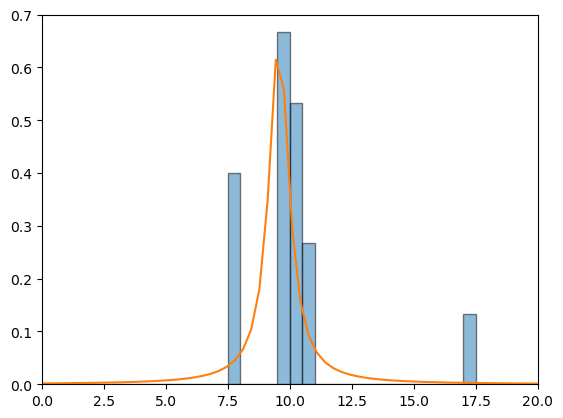

In [179]:
np.where(NLL_vals == np.min(NLL_vals))
m=m_vals[20]
gamma=gamma_vals[24]
plot.hist(mass,density=True,bins=np.arange(0,20,.5),edgecolor='black',alpha=.5)
M=np.linspace(scipy.stats.cauchy.ppf(0.001, loc=m, scale=gamma), 20, 500)
plot.plot(M,scipy.stats.cauchy.pdf(M,loc=m,scale=gamma))
plot.xlim(0,20)